In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix,classification_report
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler
from sklearn import svm
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h2>Função de scores</h2>

In [2]:
def scores(y_test,prediction):
#     print("Accuracy: " + str(accuracy_score(y_test, prediction) * 100) + "%")
#     print("Precision: " + str(precision_score(y_test, prediction) * 100) + "%")
#     print("F1 score: " + str(f1_score(y_test, prediction) * 100) + "%")
#     print("Recall: " + str(recall_score(y_test, prediction) * 100) + "%")
    scores = []
    scores.append(accuracy_score(y_test, prediction) * 100)
    scores.append(precision_score(y_test, prediction) * 100)
    scores.append(f1_score(y_test, prediction) * 100)
    scores.append(recall_score(y_test, prediction) * 100) 
#     print('Accuracy:',accuracy_score(y_test, prediction) * 100,'%')
#     print(confusion_matrix(y_test,prediction))
#     print(classification_report(y_test, prediction, target_names=["red wine","white wine"]))
    return scores

<h2>Kfold</h2>

In [3]:
def cross_validation(dados,clf,folds=10):
    scor = []
    kf = KFold(n_splits=folds)
    for train_index, test_index in kf.split(dados):
        X_train, X_test = dados.iloc[train_index], dados.iloc[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        model = clf.fit(X_train,y_train)
        prediction = model.predict(X_test)
        scor.append(scores(y_test,prediction))
    return scor

<h2>Carregando dataset</h2>

In [4]:
#carregando dataset de vinhos brancos e vermelhos
wines = pd.read_csv('wines.csv',sep=",")
#separando dados e saidas
X = wines.iloc[:,0:12]
Y = wines.iloc[:,-1]
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.160,0.30,13.70,0.056,33.0,168.0,0.99825,2.90,0.44,8.7,7,1
1,6.5,0.360,0.31,13.55,0.053,20.0,113.0,0.99544,3.20,0.56,11.0,6,1
2,8.3,0.310,0.39,2.40,0.078,17.0,43.0,0.99444,3.31,0.77,12.5,7,0
3,8.1,0.785,0.52,2.00,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5,0
4,6.5,0.240,0.38,1.00,0.027,31.0,90.0,0.98926,3.24,0.36,12.3,6,1


<h2>Pre-processamento</h2>

In [5]:
scaler = preprocessing.StandardScaler()

# Transform the feature
standardized = scaler.fit_transform(X)

# Show feature
winesS = X.copy()
winesS.iloc[0:,0:12] = standardized
winesS.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,-1.091373,-0.128234,1.735549,-0.000967,0.139434,0.924588,1.185071,-1.981037,-0.613385,-1.502407,1.353228
1,-0.551792,0.123518,-0.059414,1.704019,-0.086605,-0.593041,-0.048561,0.247917,-0.115073,0.193097,0.426120,0.207999
2,0.836739,-0.180205,0.491146,-0.639680,0.627050,-0.762074,-1.287116,-0.085589,0.569114,1.604440,1.683855,1.353228
3,0.682458,2.705162,1.385805,-0.723758,1.883084,0.364811,0.659184,0.734837,-0.052874,1.066785,-0.999313,-0.937230
4,-0.551792,-0.605417,0.422326,-0.933956,-0.828807,0.026746,-0.455515,-1.813153,0.133722,-1.151040,1.516157,0.207999


<h2>Configurando parâmetros dos classificadores</h2>

In [16]:
#CLASSIFIER 1 
clf1 = svm.SVC(kernel='linear', C = 1.0)
#CLASSIFIER 2
clf2 = svm.SVC(kernel='poly', C = 1.0)
#CLASSIFIER 3
clf3 = svm.SVC(kernel='rbf', C = 1.0) 
#CLASSIFIER 4
clf4 = svm.SVC(kernel='sigmoid', C = 1.0)
#CLASSIFIER 5
clf5 = svm.SVC(kernel='rbf', C = 0.7)

<h2>Treinando e Testando</h2>

In [18]:
scors1 = cross_validation(winesS,clf1)
scors2 = cross_validation(winesS,clf2)
scors3 = cross_validation(winesS,clf3)
scors4 = cross_validation(winesS,clf4)
scors5 = cross_validation(winesS,clf5)

In [37]:
scors5

[[99.53846153846155, 99.39148073022312, 99.69481180061037, 100.0],
 [100.0, 100.0, 100.0, 100.0],
 [99.38461538461539, 99.37888198757764, 99.58506224066389, 99.7920997920998],
 [99.53846153846155, 99.37369519832986, 99.68586387434554, 100.0],
 [99.38461538461539, 99.39393939393939, 99.59514170040485, 99.79716024340772],
 [99.6923076923077, 100.0, 99.79674796747969, 99.59432048681542],
 [99.07692307692308, 98.98989898989899, 99.39148073022312, 99.79633401221996],
 [99.84591679506933, 99.7946611909651, 99.8972250770812, 100.0],
 [99.84591679506933, 99.8003992015968, 99.90009990009989, 100.0],
 [100.0, 100.0, 100.0, 100.0]]

<h2>Função para plotar graficos comparativos</h2>

In [40]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
def plot_graph(scor):
    measures = ["accuracy","precision","f1-score","recall"]
    data = {s:{'Run '+str(i):scor[i][k] for i in range(10)}for k,s in enumerate(measures)}
    df = pd.DataFrame(data)

    df.plot(kind='barh',figsize=(20,20))

    for i in range(99,101):
        plt.axvline(x=i, color='k', linestyle='--')

    plt.xlim(98,101)
    plt.title('SVM x Kernel=rbf x c=0.7')
    plt.savefig('images_graphs/svm5.png')
    plt.show()

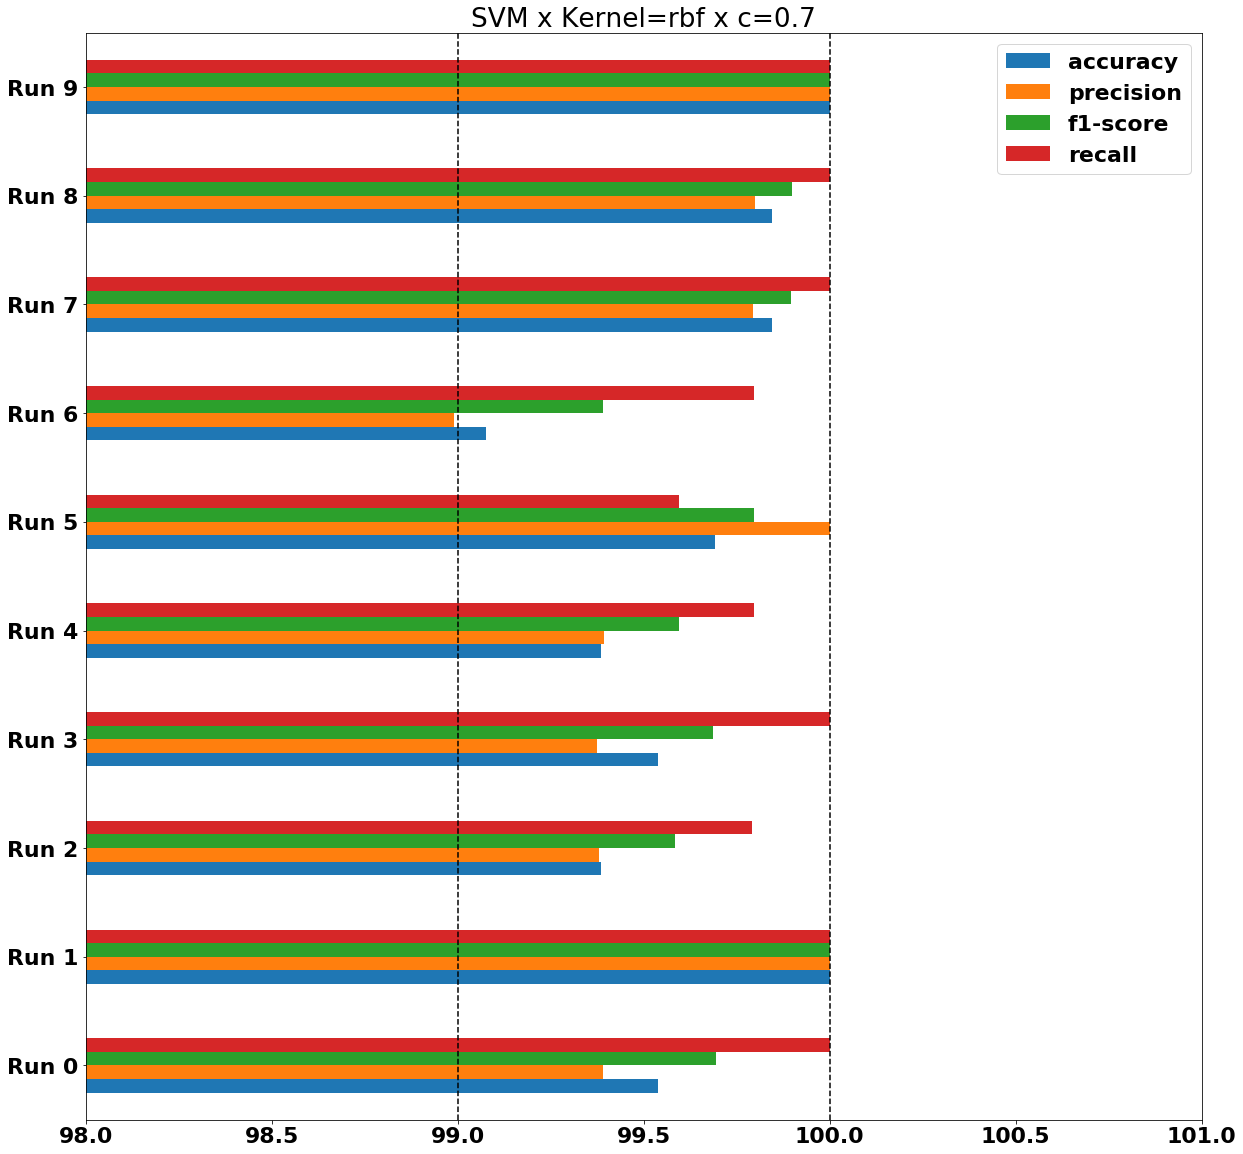

In [41]:
plot_graph(scors5)